In [1]:
Year = [1,2,3,4]
Quarter = [1, 2, 3, 4]
period = range(1, 17)
data = [4.8,4.1,6.0,6.5,5.8,5.2,6.8,7.4,6.0,5.6,7.5,7.8,6.3,5.9,8.0,8.4]

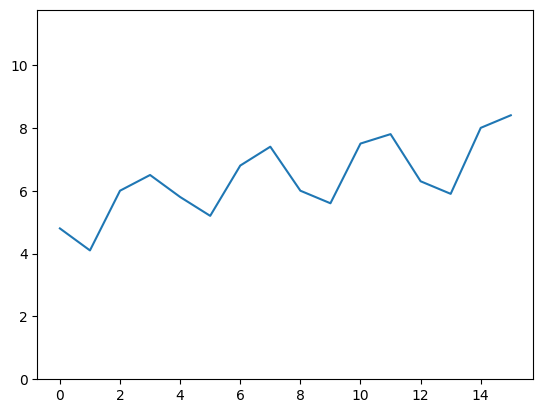

In [3]:
import matplotlib.pyplot as plt
plt.ylim(bottom = 0, top = max(data)*1.4)
plt.plot(data)

In [8]:
import numpy as np
def create_dummies(data, quarters):
    dummies = np.zeros((len(data), len(quarters)))
    
    for i in range(len(dummies)):
        dummies[i][i%len(quarters)] = 1

    return dummies[:,:-1]

dummies = create_dummies(data, Quarter)

In [24]:
from docplex.mp.model import Model

m = Model()
b_0 = m.continuous_var(name = 'Intercept', lb = -10e6)
b_1 = m.continuous_var(name = 'Trend', lb = -10e6)
b_x = m.continuous_var_list(len(Quarter)-1, lb = -10e6, name = 'Slope')

mse = []
for i in range(len(data)):
    mse.append((b_0 + b_1 * Year[i%len(Year)] + b_x @ dummies[i] - data[i])**2)

m.minimize(sum(mse))

In [25]:
solution = m.solve(log_output = True)

Version identifier: 22.1.1.0 | 2023-02-11 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Number of nonzeros in lower triangle of Q = 7
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for factor of Q:
  Rows in Factor            = 5
  Integer space required    = 5
  Total non-zeros in factor = 15
  Total FP ops to factor    = 55
Tried aggregator 1 time.
QP Presolve eliminated 1 rows and 1 columns.
QP Presolve added 0 rows and 5 columns.
Reduced QP has 4 rows, 9 columns, and 16 nonzeros.
Reduced QP objective Q matrix has 4 nonzeros.
Presolve time = 0.02 sec. (0.00 ticks)
Parallel mode: using up to 4 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 5
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 4
  Rows in Factor            = 4
  Integer space required    = 4


In [26]:
print(solution) # The numbers seem way to dumb. But I will trust it.

solution for: docplex_model10
objective: 7.30251
status: OPTIMAL_SOLUTION(2)
Intercept=-168630.578
Trend=42159.526
Slope_0=126476.777
Slope_1=84316.727
Slope_2=42159.076

